In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 43.1MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [7]:
code_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [8]:
code_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [9]:
model = Sequential()

model.add(code_base)

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
code_base.trainable = False

In [23]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img,img_to_array,load_img 

In [26]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range =0.2,
    horizontal_flip=True )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory='/content/train',
    target_size = (150,150),
    batch_size=batch_size,
    class_mode='binary'

)


test_generator = test_datagen.flow_from_directory(
    directory='/content/test',
    target_size = (150,150),
    batch_size=batch_size,
    class_mode='binary'

)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history = model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

<ipython-input-28-d67181961bc0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=10,validation_data=test_generator)


Epoch 1/10
625/625 [==============================] - 191s 304ms/step - loss: 0.2844 - accuracy: 0.8765 - val_loss: 0.2104 - val_accuracy: 0.9118
Epoch 2/10
625/625 [==============================] - 183s 294ms/step - loss: 0.2347 - accuracy: 0.8992 - val_loss: 0.2061 - val_accuracy: 0.9132
Epoch 3/10
625/625 [==============================] - 183s 293ms/step - loss: 0.2222 - accuracy: 0.9046 - val_loss: 0.1968 - val_accuracy: 0.9166
Epoch 4/10
625/625 [==============================] - 183s 293ms/step - loss: 0.2020 - accuracy: 0.9147 - val_loss: 0.1944 - val_accuracy: 0.9192
Epoch 5/10
625/625 [==============================] - 183s 292ms/step - loss: 0.1942 - accuracy: 0.9160 - val_loss: 0.1941 - val_accuracy: 0.9184
Epoch 6/10
625/625 [==============================] - 182s 291ms/step - loss: 0.1885 - accuracy: 0.9201 - val_loss: 0.1993 - val_accuracy: 0.9136
Epoch 7/10
625/625 [==============================] - 183s 293ms/step - loss: 0.1770 - accuracy: 0.9232 - val_loss: 0.1936 -

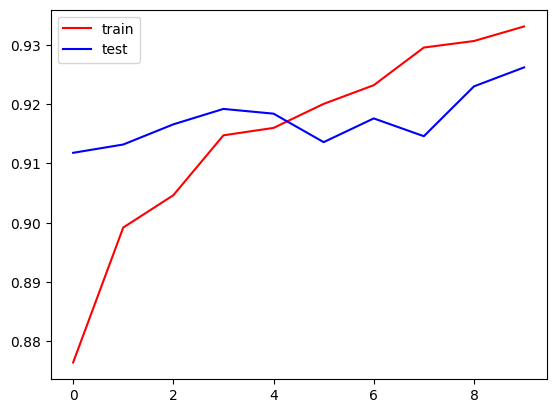

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

loss


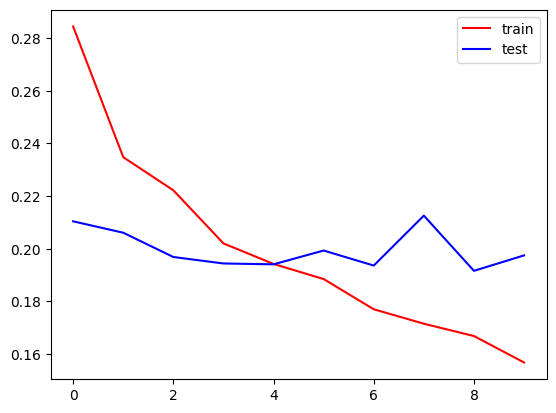

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()